<a href="https://colab.research.google.com/github/bork0047/Data-Analysis/blob/main/CV_Lab03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Loading and preparing the dataset Keras can be used to load the dataset in a simple way as can
#be seen below

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#dataset size
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
x_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
x_valid.shape

(5000, 28, 28)

In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
#class names
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
'Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
#check the the class of the first 10 images
for i in range(10):
  print(f'The class of image {i} is {class_names[y_train[0]]}')

The class of image 0 is Coat
The class of image 1 is Coat
The class of image 2 is Coat
The class of image 3 is Coat
The class of image 4 is Coat
The class of image 5 is Coat
The class of image 6 is Coat
The class of image 7 is Coat
The class of image 8 is Coat
The class of image 9 is Coat


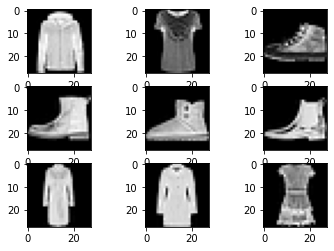

In [ ]:
from matplotlib import pyplot
#lets show some of these images
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Build Neural Network
# create a neural network model using keras
model = keras.models.Sequential()
# build the first layer, this is the input layer. Note, that flatten converts␣
#↪→the 28 by 28 image into 1D array
model.add(keras.layers.Flatten(input_shape=[28,28]))
# add a hidden layer with 300 neurons
model.add(keras.layers.Dense(300,activation='relu'))
# add another hidden layer with 100 neurons
model.add(keras.layers.Dense(100,activation='relu'))
# add output layer (note we have 10 outputs representing 10 classes)
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Recall, we said that the weights are ranomly initialised, you can check the weights using the
#following function:
weights, biases = model.layers[1].get_weights()

In [ ]:
weights

array([[-0.01184564, -0.0521188 ,  0.00449999, ...,  0.05489787,
         0.00613366, -0.05665407],
       [-0.03613075,  0.06792103,  0.02028327, ..., -0.06017597,
         0.02008418, -0.00333282],
       [-0.01397691,  0.01560771, -0.0387265 , ..., -0.05516262,
         0.0186107 , -0.04429555],
       ...,
       [ 0.01028007,  0.03569818, -0.04514289, ..., -0.00832755,
         0.0725956 ,  0.0675433 ],
       [-0.00819533,  0.05695342,  0.06217869, ..., -0.05712921,
         0.04777429, -0.0628488 ],
       [ 0.00589979,  0.06193404,  0.05470832, ...,  0.02393784,
        -0.05706892,  0.05716184]], dtype=float32)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics='accuracy')

In [ ]:
#training
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7263 - accuracy: 0.7623 - val_loss: 0.5175 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4919 - accuracy: 0.8284 - val_loss: 0.4563 - val_accuracy: 0.8430
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4448 - accuracy: 0.8427 - val_loss: 0.4372 - val_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4175 - accuracy: 0.8531 - val_loss: 0.4306 - val_accuracy: 0.8468
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3970 - accuracy: 0.8602 - val_loss: 0.3779 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3799 - accuracy: 0.8654 - val_loss: 0.3841 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 9s 6ms/step - loss: 0.3659 - accuracy: 0.8695 - val_loss: 0.3606 - val_accur

Another thing to note is that we pass the validation set. You will notice that keras at each epoch
during the training process display the number of instances processed, the mean training time per
instance, and the loss and accuracy. A good model should show a decreasing loss value over time
as well as increase in accuracy.
The fit() function returns a History object that contains the training parameters (history.params),
the list of epochs it went through (history.epoch), and a history dictionary (history.history) con-
taining the loss and extra metrics. This is particularly useful to display the loss plots, and assess if
the model is overfitting or not as can be seen below:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

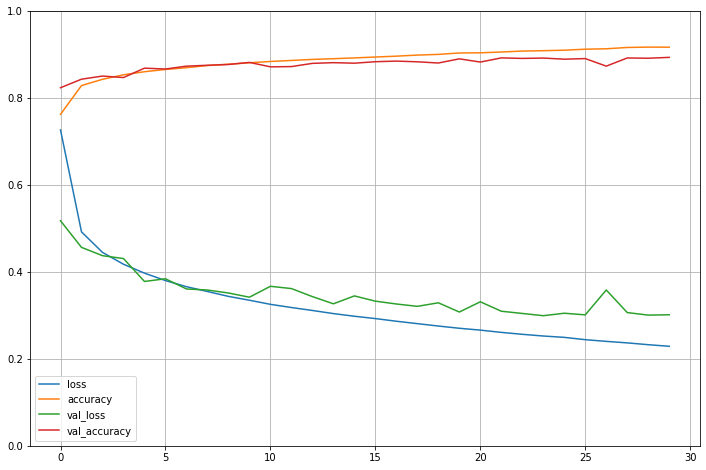

In [ ]:
pd.DataFrame(history.history).plot(figsize=(12,8))
plt.grid(True)
plt.gca().set_ylim(0,1) # set the range between 0 to 1
plt.show()

In [ ]:
# the function below returns accuracy and loss values of the model
results = model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 71.9405 - accuracy: 0.8350


In [ ]:
print(f'Accuracy of the Neural Network is {round(results[1],2)*100}%')

Accuracy of the Neural Network is 83.0%


In [ ]:
# consider the first three imgaes in the testing set
testing_images = X_test[:3]
# use predict to classify the images above
y_prob = model.predict(testing_images)
y_prob.round(2)

1/1 [==============================] - 0s 104ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

If you look at the array above, you will notice that for each image the model estimates the proba-
bility per class, from class 0 to 9 (recall, we have 10 different classes in our dataset):
• The model estimates that the first image in the testing_images is of class 9
• Similarly, the second image is of class 2 and so on
Instead, and if you only want the class with the highest estimated probability, then you can use
the predict_classes() method as follows:

In [ ]:
import numpy as np
y_pred = np.argmax(model.predict(testing_images), axis=-1)
y_pred

1/1 [==============================] - 0s 48ms/step


array([9, 2, 1])

In [ ]:
# Check the actual class names of the predicted test imgaes
for i in range (len(testing_images)):
  print (f'The class name of {y_pred[i]} is {class_names[y_pred[i]]}')

The class name of 9 is Ankle boot
The class name of 2 is Pullover
The class name of 1 is Trouser


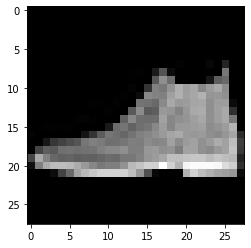

In [ ]:
# You can further verify this by visualising these testing images
pyplot.imshow(testing_images[0], cmap=pyplot.get_cmap('gray'))

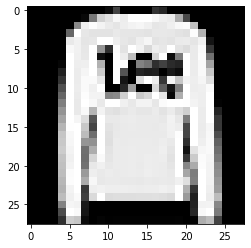

In [ ]:
pyplot.imshow(testing_images[1], cmap=pyplot.get_cmap('gray'))

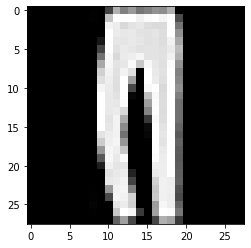

In [ ]:
pyplot.imshow(testing_images[2], cmap=pyplot.get_cmap('gray'))